

## Task 1

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Assuming the dataset is in a CSV file named 'stock_data.csv'
data = pd.read_csv('part 1. data.csv')

# Display the first few rows
print(data.head())


   Unnamed: 0  Stock Price  P/E Ratio  Dividend Yield  Market Cap  \
0           1    79.381258  15.048296        1.870956   10.495274   
1           2   107.248490  29.487398        1.871060   13.025350   
2           3    59.508983  29.748371        2.052769   27.192751   
3           4    56.892746  17.995553        2.666637   15.837167   
4           5   158.197056  21.661047        2.879441   21.222265   

   Stock Return  
0     13.537425  
1      0.266531  
2     48.338263  
3     19.535499  
4     -1.425241  


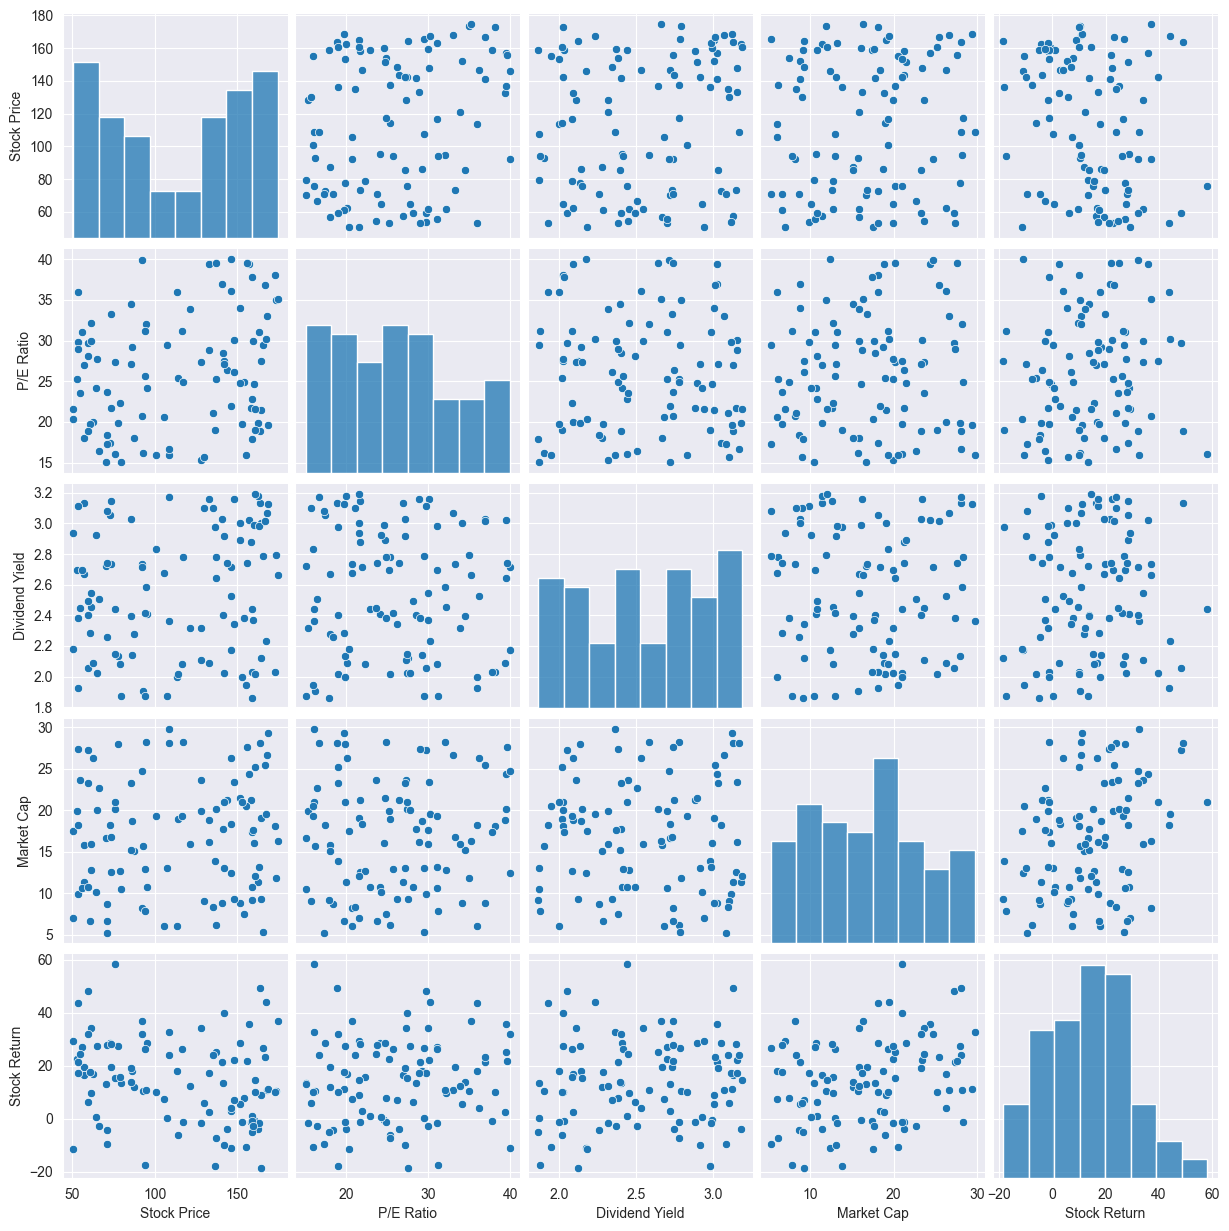

In [2]:

# List of variables
variables = ['Stock Price', 'P/E Ratio', 'Dividend Yield', 'Market Cap', 'Stock Return']

sns.pairplot(data[variables])
plt.show()

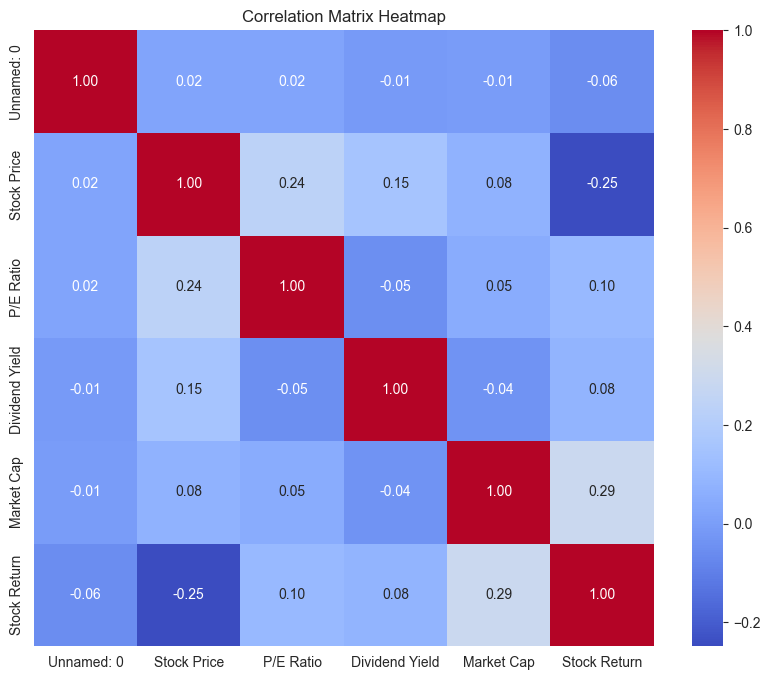

In [3]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

## Task 2
На первый взгляд, сложно выявить какую-либо взаимосвязь между данными 


## Task 3

In [4]:
import statsmodels.api as sm

# Define independent and dependent variables
X = data[['Stock Price', 'P/E Ratio', 'Dividend Yield', 'Market Cap']]

y = data['Stock Return']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Get the coefficients
coefficients = model.params
print(coefficients)


const            -8.525384
Stock Price      -0.131074
P/E Ratio         0.392502
Dividend Yield    5.888845
Market Cap        0.737782
dtype: float64


## Task 4
### Формула множественной линейной регрессии:

$$
\text{Stock Return} = \beta_0 + \beta_1(\text{Stock Price}) + \beta_2(\text{P/E Ratio}) + \beta_3(\text{Dividend Yield}) + \beta_4(\text{Market Cap})
$$




## Task 5

In [5]:
# R-squared
r_squared = model.rsquared
print(f"R-squared: {r_squared}")

# F-statistic and its p-value
f_statistic = model.fvalue
f_pvalue = model.f_pvalue
print(f"F-statistic: {f_statistic}, p-value: {f_pvalue}")

# p-values for each coefficient
p_values = model.pvalues
print(p_values)

R-squared: 0.20367378964891525
F-statistic: 6.074460995110392, p-value: 0.0002138802769654981
const             0.463660
Stock Price       0.000678
P/E Ratio         0.067938
Dividend Yield    0.109305
Market Cap        0.001040
dtype: float64


## Task 6
- Нужно ориентироваться на показатели P/E Ratio и дивидендную доходность при прогнозировании доходности акций.
- Цена акции и рыночная капитализация не показали значимого влияния.

## Task 7

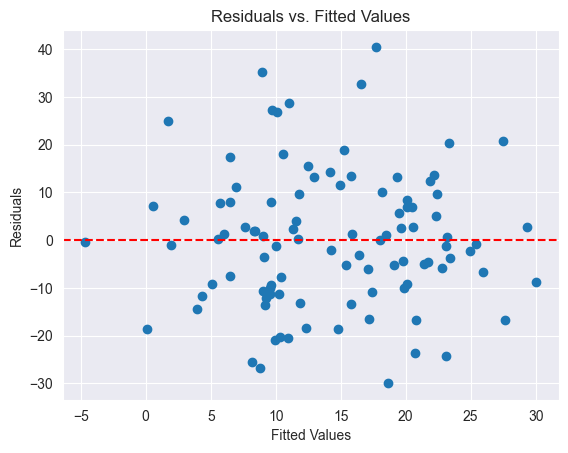

In [6]:
# Residuals and fitted values
residuals = model.resid
fitted = model.fittedvalues

# Plot
plt.scatter(fitted, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

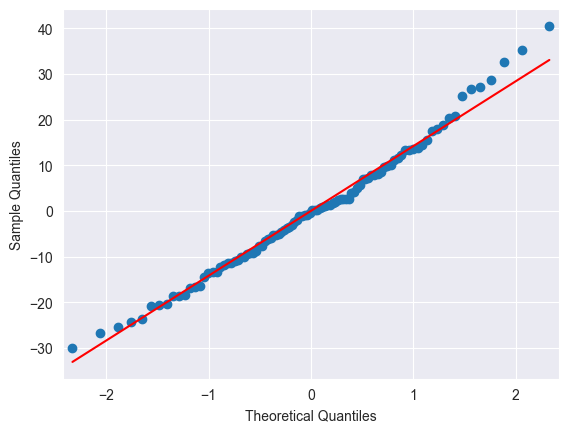

Shapiro-Wilk Test: ShapiroResult(statistic=np.float64(0.9867753388276934), pvalue=np.float64(0.4226963128692167))


In [7]:
sm.qqplot(residuals, line='s')
plt.show()

from scipy.stats import shapiro
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk Test: {shapiro_test}")

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

          feature        VIF
0           const  63.367114
1     Stock Price   1.096021
2       P/E Ratio   1.068030
3  Dividend Yield   1.034649
4      Market Cap   1.009629


## Task 8

In [9]:
new_data = pd.DataFrame({
    'const': 1,
    'Stock Price': [200],
    'P/E Ratio': [45],
    'Dividend Yield': [1.2],
    'Market Cap': [35]
})

# Predict stock return
predicted_return = model.predict(new_data)
print(f"Predicted Stock Return: {predicted_return.iloc[0]}")

Predicted Stock Return: 15.811432905519972
